In [1]:
import pandas as pd

data = pd.read_parquet("processed_data.parquet")
data

,run_id,ttf,next_exec_time,neuroticism,neuroticism_raw,impairment,transition,duration,duration_raw
0,134146,0.000000,3.654797,"[-inf, 0.406)",0.375,"[-inf, 1.4817823276676907)",NoTransition,"[0.0, 5.0)",1
1,134146,0.597441,4.438645,"[-inf, 0.406)",0.375,"[-inf, 1.4817823276676907)",NoTransition,"[0.0, 5.0)",2
2,134146,0.553513,2.943222,"[-inf, 0.406)",0.375,"[-inf, 1.4817823276676907)",NoTransition,"[0.0, 5.0)",3
3,134146,0.561716,5.405761,"[-inf, 0.406)",0.375,"[-inf, 1.4817823276676907)",NoTransition,"[0.0, 5.0)",4
4,134146,0.586512,5.225161,"[-inf, 0.406)",0.375,"[-inf, 1.4817823276676907)",NoTransition,"[5.0, 10.0)",5
...,...,...,...,...,...,...,...,...,...
6755,137353,0.577341,6.439071,"[0.406, 0.656)",0.625,"[-inf, 1.4817823276676907)",Higher2Lower,"[5.0, 10.0)",6
6756,137353,0.557074,4.680858,"[0.406, 0.656)",0.625,"[-inf, 1.4817823276676907)",Higher2Lower,"[5.0, 10.0)",7
6757,137353,0.534339,3.467878,"[0.406, 0.656)",0.625,"[-inf, 1.4817823276676907)",Higher2Lower,"[5.0, 10.0)",8
6758,137353,0.560288,2.325759,"[0.406, 0.656)",0.625,"[-inf, 1.4817823276676907)",NoTransition,"[0.0, 5.0)",1


In [25]:
data["neuro"] = data.neuroticism.astype("category").cat.rename_categories(["low", "med", "high"])
data["imp"] = data.impairment.astype("category").cat.rename_categories(["low", "med", "high"])
data["dur"] = data.duration.astype("category").cat.rename_categories(["low", "med", "high"])
data

,run_id,ttf,next_exec_time,neuroticism,neuroticism_raw,impairment,transition,duration,duration_raw,neuro,imp,dur
0,134146,0.000000,3.654797,"[-inf, 0.406)",0.375,"[-inf, 1.4817823276676907)",NoTransition,"[0.0, 5.0)",1,low,low,low
1,134146,0.597441,4.438645,"[-inf, 0.406)",0.375,"[-inf, 1.4817823276676907)",NoTransition,"[0.0, 5.0)",2,low,low,low
2,134146,0.553513,2.943222,"[-inf, 0.406)",0.375,"[-inf, 1.4817823276676907)",NoTransition,"[0.0, 5.0)",3,low,low,low
3,134146,0.561716,5.405761,"[-inf, 0.406)",0.375,"[-inf, 1.4817823276676907)",NoTransition,"[0.0, 5.0)",4,low,low,low
4,134146,0.586512,5.225161,"[-inf, 0.406)",0.375,"[-inf, 1.4817823276676907)",NoTransition,"[5.0, 10.0)",5,low,low,med
...,...,...,...,...,...,...,...,...,...,...,...,...
6755,137353,0.577341,6.439071,"[0.406, 0.656)",0.625,"[-inf, 1.4817823276676907)",Higher2Lower,"[5.0, 10.0)",6,med,low,med
6756,137353,0.557074,4.680858,"[0.406, 0.656)",0.625,"[-inf, 1.4817823276676907)",Higher2Lower,"[5.0, 10.0)",7,med,low,med
6757,137353,0.534339,3.467878,"[0.406, 0.656)",0.625,"[-inf, 1.4817823276676907)",Higher2Lower,"[5.0, 10.0)",8,med,low,med
6758,137353,0.560288,2.325759,"[0.406, 0.656)",0.625,"[-inf, 1.4817823276676907)",NoTransition,"[0.0, 5.0)",1,med,low,low


In [47]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

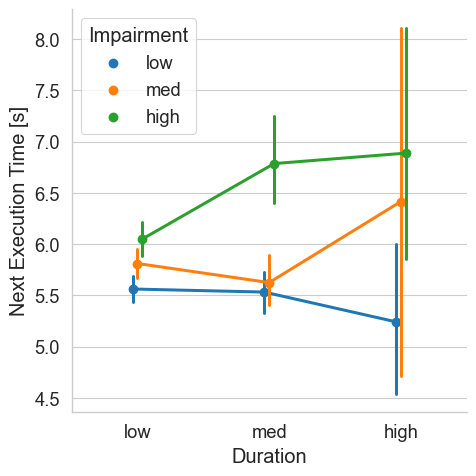

In [50]:
fg = sns.catplot(
    kind="point",
    data=data,
    y="next_exec_time",
    ci=95,
    hue="imp",
    x="dur",
    dodge=True,
    # legend=False,
    legend_out=False,
)
fg.legend.set_title("Impairment")
fg.set_axis_labels("Duration", "Next Execution Time [s]")
plt.show()

fg.savefig("./duration_vs_exectime.png")